In [26]:
! pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [27]:
# Import required libraries
import pandas as pd

# Load dataset
df = pd.read_csv("../dataset/heart.csv")  # ../ means go up one folder to dataset

# Show first 5 rows
df.head()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [28]:
print("SHAPE:", df.shape)

# column info
df.info()

# checking missing values 
df.isnull().sum()



SHAPE: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# enable plot styles
sns.set(style="whitegrid")

## checking target variable distribution
1 - heart disease presnt
0 - no heart disease present

C:\Windows\Temp\ipykernel_21104\294211914.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette = 'Set2')


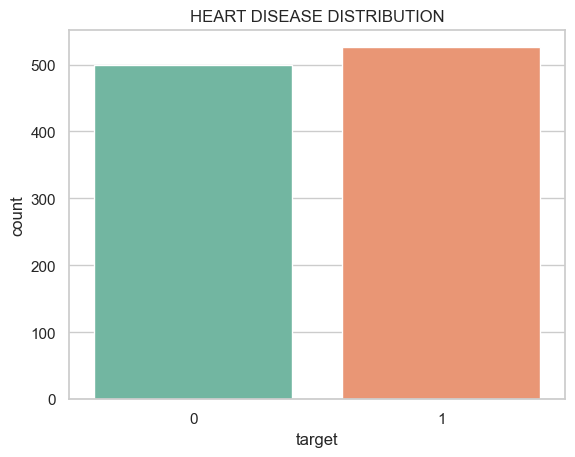

target
1    526
0    499
Name: count, dtype: int64


In [32]:
sns.countplot(x='target',data=df,palette = 'Set2')
plt.title("HEART DISEASE DISTRIBUTION")
plt.show()

print(df['target'].value_counts())

## AGE DISTRIBUTION

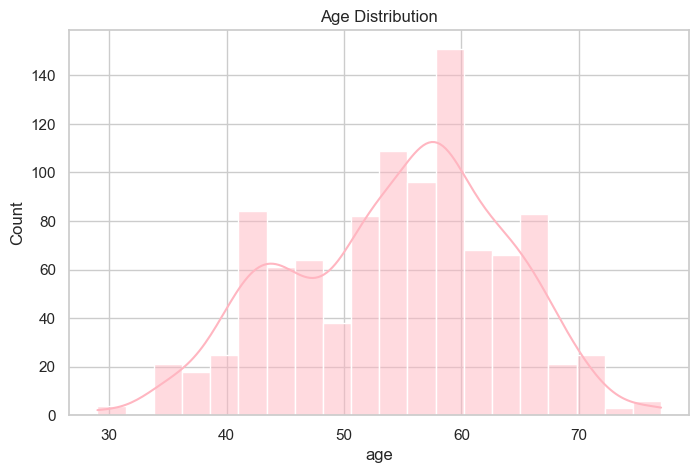

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color = 'lightpink')
plt.title("Age Distribution")
plt.show()

## gender vs heart disease
sex column
0 ->female
1 -> male


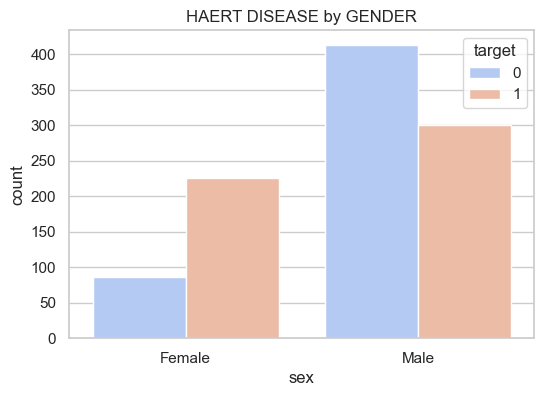

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex',hue ='target', data=df, palette="coolwarm")
plt.title("HAERT DISEASE by GENDER")
plt.xticks([0,1], ['Female','Male'])
plt.show()

## CORRELATION HEATMAP

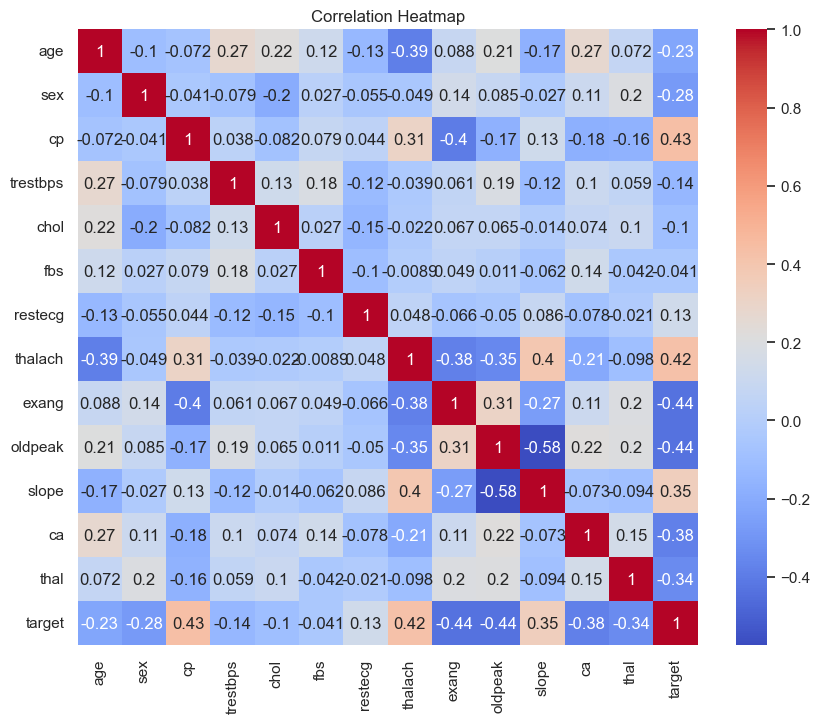

In [35]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## DATA PREPROCESSING

### 1- FEATURE & TARGET SEPARATION 
separating our input features (X) and output target (y)  

In [36]:
# features (All columns except target)
X = df.drop('target', axis=1)

# Traget (only target columns)
y = df['target']

### 2- train-test split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (820, 13)
Testing set shape: (205, 13)


3 - Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## PHASE 3 - MODEL TRAINING
trying algorithms 

### TRAINING WITH LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
log_reg = LogisticRegression()

In [42]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [43]:
# predictions
y_pred_lr = log_reg.predict(X_test)

In [44]:
# EVALUATION
print("Logistic Regression Accuracy:", accuracy_score(y_test,y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix;\n",confusion_matrix(y_test,y_pred_lr))

Logistic Regression Accuracy: 0.7951219512195122

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Confusion Matrix;
 [[73 29]
 [13 90]]


## RANDOM FOREST CLASSIFIER

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test,y_pred_rf))
print("\nclassification Report:\n", classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.9853658536585366

classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test,y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test,y_pred_knn))

KNN Accuracy: 0.8341463414634146

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



## SVM


In [48]:
from sklearn.svm import SVC

In [49]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM ACCURACY:", accuracy_score(y_test,y_pred_svm))
print("\nClassification Report:\n",classification_report(y_test,y_pred_svm))

SVM ACCURACY: 0.8878048780487805

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



## COMPARE ALL MODELS

In [50]:
results = {
    "Logistic Regression" : accuracy_score(y_test,y_pred_lr),
    "Random Forest" : accuracy_score(y_test,y_pred_rf),
    "KNN" : accuracy_score(y_test,y_pred_knn),
    "SVM" : accuracy_score(y_test,y_pred_svm)
}
    
print("Model Comparison:", results)

Model Comparison: {'Logistic Regression': 0.7951219512195122, 'Random Forest': 0.9853658536585366, 'KNN': 0.8341463414634146, 'SVM': 0.8878048780487805}


### SAVING THE MODEL

In [51]:
import joblib

In [52]:
joblib.dump(rf,"../heart_disease_model.pkl")
print("Model saved successfully!")

Model saved successfully!
